<a href="https://colab.research.google.com/github/SwirltheDragoness/Assignment-4/blob/main/Week5assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
# ---------------------------------------------
# STEP 1: Import required libraries
# ---------------------------------------------
# pandas: data handling and data frames
# numpy: numerical computations
# matplotlib: data visualization
# sklearn: machine learning tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [42]:
# ---------------------------------------------
# STEP 2: Load the dataset
# ---------------------------------------------
# The file must already exist in the Colab working directory
advertising_data = pd.read_csv("Advertising.csv")

# Display the first few rows to confirm loading
advertising_data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [50]:
# ---------------------------------------------
# STEP 3: Define predictors (features) and target
# ---------------------------------------------
# Predictor variables:
#   TV        -> TV advertising spend
#   Radio     -> Radio advertising spend
#   Newspaper -> Newspaper advertising spend
# Target variable:
#   Sales     -> Product sales
X = advertising_data[["TV", "Radio", "Newspaper"]]
y = advertising_data["Sales"]

In [45]:
# ---------------------------------------------
# STEP 4: Split the data into training and testing sets
# ---------------------------------------------
# 80% of the data is used for training
# 20% is used for testing
# random_state ensures reproducible results
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [46]:
# ---------------------------------------------
# STEP 5: Train the Multiple Linear Regression model
# ---------------------------------------------
# Create the Linear Regression model
model = LinearRegression()

# Fit the model using the training data
model.fit(X_train, y_train)

LinearRegression()

In [47]:
# ---------------------------------------------
# STEP 6: Make predictions on the test data
# ---------------------------------------------
# Predict sales using the trained model
y_pred = model.predict(X_test)

In [48]:
# ---------------------------------------------
# STEP 7: Evaluate the model
# ---------------------------------------------
# Intercept represents expected sales when all ad spending is zero
print("Intercept:", model.intercept_)

# Coefficients show the impact of each advertising medium on sales
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature} Coefficient:", coef)

# R² score indicates how well the model explains sales variability
print("R² Score:", r2_score(y_test, y_pred))

# RMSE measures the average prediction error
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Intercept: 2.979067338122629
TV Coefficient: 0.044729517468716326
Radio Coefficient: 0.18919505423437652
Newspaper Coefficient: 0.0027611143413671935
R² Score: 0.899438024100912
RMSE: 1.78159966153345


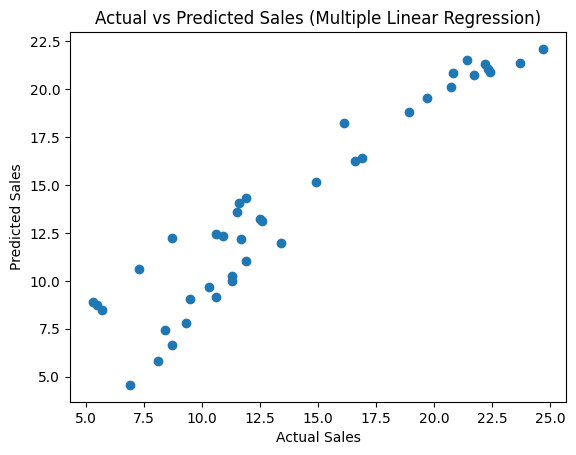

In [49]:
# ---------------------------------------------
# STEP 8: (Optional) Plot Actual vs Predicted Sales
# ---------------------------------------------
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales (Multiple Linear Regression)")
plt.show()